In [9]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import scipy.signal as signal

In [68]:
def MakeFigure(ax, pilifer_signal, body_lateral, nectary_lateral):
    
    time = np.arange(len(pilifer_signal))*t
    
    ax.plot(time, body_lateral, label = 'body')
    ax.plot(time, nectary_lateral, 'k', label = 'nectary')
    ax.legend()
    ax.set_ylabel('position (in pixel)')
    ax.set_xlabel('Time (seconds)')
    
    ax2 = ax.twinx()
    ax2.plot(time, pilifer_signal, 'r', label = 'pilifer', alpha = 0.5)
    plt.legend()
    ax2.set_ylabel('Proboscis angle (in degree)')

# Visualize the body, nectary and proboscis deflections at the base

In [4]:
filepath= './dataFolder/TrackingData_2022_11_10/thresholded_bodyparts/'
trackPoints_files = glob.glob(filepath + '*bodyparts.csv')

filepath_another = './dataFolder/TrackingData_2022_11_10/ErrorAngle/'
pilifer_signal_files = glob.glob(filepath_another + '*errorAngle.csv')

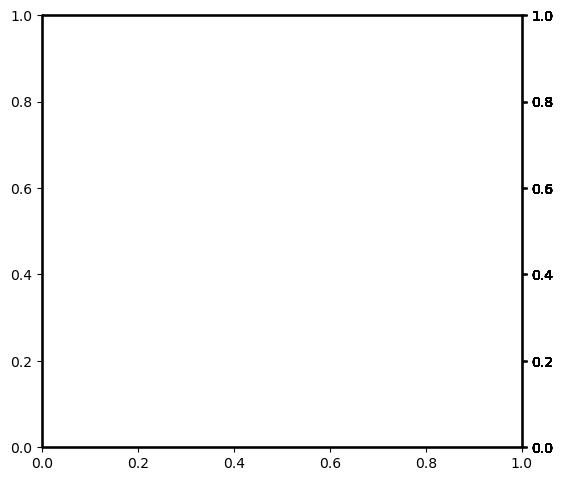

In [75]:
fig_directory_name = './dataFolder/TrackingData_2022_11_10/ErrorAngle/Plots/'
freq = 100
t = 1/freq

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.9])


for f in pilifer_signal_files:
    pilifer_signal = pd.read_csv(f, index_col=0)
    mothID = f.split('\\')[-1][:-15]
    
    trackPoints = pd.read_csv([file for file in trackPoints_files if mothID in file][0], index_col=0)
    
    pilifer_signal_smooth = signal.savgol_filter(pilifer_signal.values.flatten(), 5, 3)
    pilifer_signal_smooth_deg = pilifer_signal_smooth*(180/np.pi)
    
    body_lateral = trackPoints.loc[:,'body_x']
    nectary_lateral = trackPoints.loc[:,'nectary_x']
    
    MakeFigure(ax, 
               pilifer_signal=pilifer_signal_smooth_deg, 
               body_lateral=body_lateral, 
               nectary_lateral=nectary_lateral)

    plt.savefig(fig_directory_name + mothID + '.png')
    plt.cla()
    ax.cla()